### Beauty Ahmad

In [1]:
#data cleaning and manipulation libraries
import numpy as np
import pandas as pd

#visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#text processing library
from textblob import TextBlob

In [2]:
beauty_df = pd.read_csv("beauty.csv")


In [3]:
beauty_df.head()

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,Size:
0,0,5,True,2016-09-01,A3CIUOJXQ5VDQ2,B0000530HU,Shelly F,As advertised. Reasonably priced,7.0 oz
1,1,5,True,2013-11-14,A3H7T87S984REU,B0000530HU,houserules18,Like the oder and the feel when I put it on my...,7.0 oz
2,2,1,True,2013-08-18,A3J034YH7UG4KT,B0000530HU,Adam,I bought this to smell nice after I shave. Wh...,7.0 oz
3,3,5,False,2011-05-03,A2UEO5XR3598GI,B0000530HU,Rich K,HEY!! I am an Aqua Velva Man and absolutely lo...,7.0 oz
4,4,5,True,2011-05-06,A3SFRT223XXWF7,B00006L9LC,C. C. Christian,If you ever want to feel pampered by a shampoo...,200ml/6.7oz


In [4]:
del beauty_df["Unnamed: 0"]

In [5]:
beauty_df['reviewTime'] = pd.to_datetime(beauty_df['reviewTime'])
#beauty_df.head()

In [6]:
beauty_df.rename(columns={"overall":"productRating","asin":"productID", "Size:":"size"}, inplace=True)
beauty_df.head()

,productRating,verified,reviewTime,reviewerID,productID,reviewerName,reviewText,size
0,5,True,2016-09-01,A3CIUOJXQ5VDQ2,B0000530HU,Shelly F,As advertised. Reasonably priced,7.0 oz
1,5,True,2013-11-14,A3H7T87S984REU,B0000530HU,houserules18,Like the oder and the feel when I put it on my...,7.0 oz
2,1,True,2013-08-18,A3J034YH7UG4KT,B0000530HU,Adam,I bought this to smell nice after I shave. Wh...,7.0 oz
3,5,False,2011-05-03,A2UEO5XR3598GI,B0000530HU,Rich K,HEY!! I am an Aqua Velva Man and absolutely lo...,7.0 oz
4,5,True,2011-05-06,A3SFRT223XXWF7,B00006L9LC,C. C. Christian,If you ever want to feel pampered by a shampoo...,200ml/6.7oz


#### The Data at a glance

In [7]:
beauty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5269 entries, 0 to 5268
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   productRating  5269 non-null   int64         
 1   verified       5269 non-null   bool          
 2   reviewTime     5269 non-null   datetime64[ns]
 3   reviewerID     5269 non-null   object        
 4   productID      5269 non-null   object        
 5   reviewerName   5269 non-null   object        
 6   reviewText     5264 non-null   object        
 7   size           4358 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(5)
memory usage: 293.4+ KB


In [8]:
beauty_df.isnull().sum()

productRating      0
verified           0
reviewTime         0
reviewerID         0
productID          0
reviewerName       0
reviewText         5
size             911
dtype: int64

### Analysis with datetimes

In [9]:
time_span = beauty_df["reviewTime"].max() - beauty_df["reviewTime"].min()

print ("Time span of the data: {}".format(time_span))

Time span of the data: 5084 days 00:00:00


In [10]:
beauty_df["year"] = beauty_df["reviewTime"].dt.year
beauty_df["yearMonth"] = beauty_df['reviewTime'].apply(lambda x: x.strftime('%B-%Y'))

In [11]:
year_count = beauty_df.groupby("year").count().sort_values(
    "reviewText", ascending=False)[["reviewText"]]
year_count.rename(columns={"reviewText":"numberOfReviews"}, inplace=True)

print("AMOUNT OF REVIEWS PER YEAR:")
year_count

AMOUNT OF REVIEWS PER YEAR:


,numberOfReviews
year,
2016,1232
2015,1027
2017,825
2014,784
2013,756
2018,443
2012,111
2009,25
2008,20


In [12]:
month_count = beauty_df.groupby("yearMonth").count()[["reviewText"]]
month_count.rename(columns={"reviewText":"numberOfReviews"}, inplace=True)

print("AMOUNT OF REVIEWS PER MONTH:")
month_count

AMOUNT OF REVIEWS PER MONTH:


,numberOfReviews
yearMonth,
April-2007,2
April-2011,5
April-2013,76
April-2014,36
April-2015,83
...,...
September-2013,56
September-2014,84
September-2015,75


In [13]:
yearly_rating = beauty_df.groupby("year").agg({"reviewText":"count","productRating":"mean"}).sort_values(
    "reviewText",ascending=False)
yearly_rating.rename(columns={"reviewText":"numberOfReviews", "productRating":"averageProductRating"}, inplace=True)

print("AVERAGE RATINGS PER YEAR:")
yearly_rating

AVERAGE RATINGS PER YEAR:


,numberOfReviews,averageProductRating
year,,
2016,1232,4.933442
2015,1027,4.932171
2017,825,4.713939
2014,784,4.891582
2013,756,4.880952
2018,443,3.724605
2012,111,4.927928
2009,25,4.680000
2008,20,3.200000


In [14]:
yearly_month_rating = beauty_df.groupby(["yearMonth"]).agg({"reviewText":"count", "productRating":"mean"})
yearly_month_rating.rename(columns={"reviewText":"numberOfReviews", "productRating":"averageProductRating"}, inplace=True)

print("AVERAGE RATINGS PER MONTH:")
yearly_month_rating

AVERAGE RATINGS PER MONTH:


,numberOfReviews,averageProductRating
yearMonth,,
April-2007,2,5.000000
April-2011,5,3.800000
April-2013,76,4.460526
April-2014,36,4.972222
April-2015,83,4.927711
...,...,...
September-2013,56,5.000000
September-2014,84,4.940476
September-2015,75,4.893333


#### Visualisations

Text(0.5, 1.0, 'Number of reviews per year')

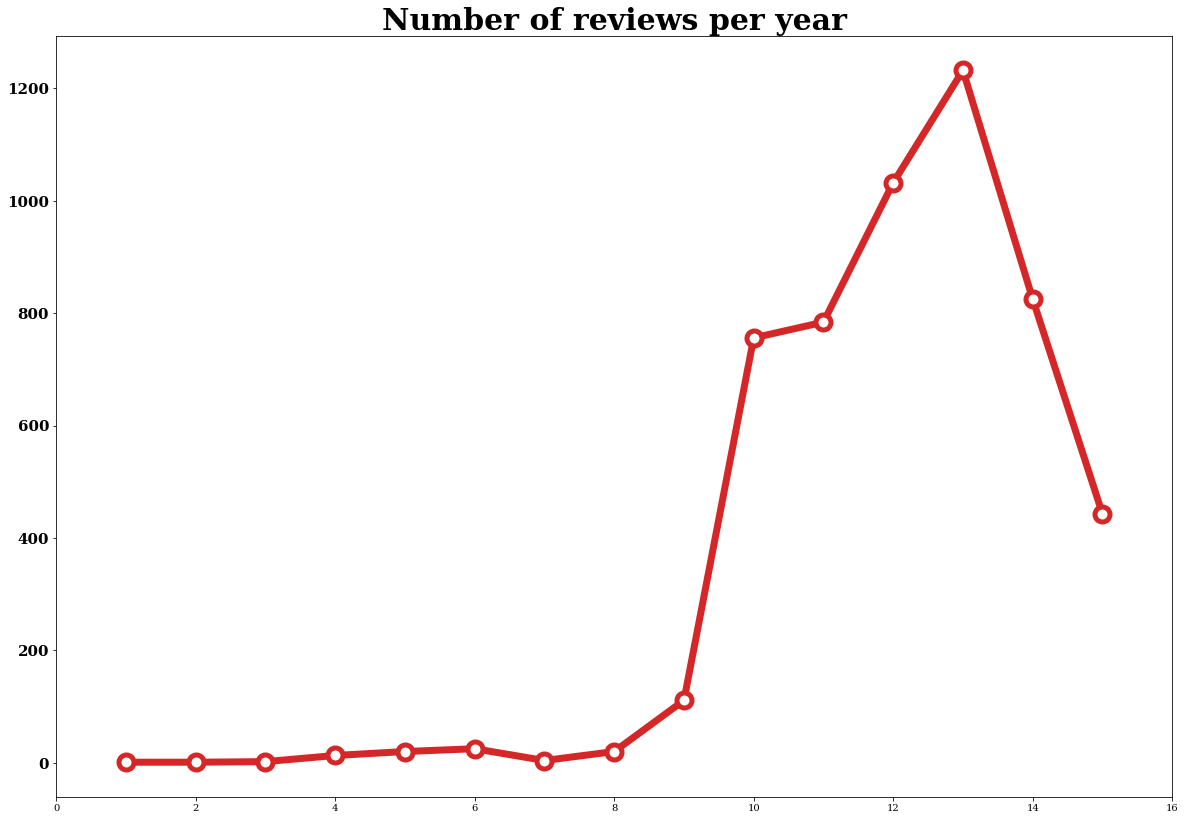

In [46]:
review_count_y  = beauty_df.groupby(['year']).count()[['reviewText']]
axes1 =review_count_y
x = np.arange(1,16)

plt.rc('font', family = 'serif')
fig, ax  = plt.subplots(figsize = (20,14))
plt.xlim(0,16)

ax.plot(x, axes1.reviewText, 'tab:red', lw = 7)
ax.plot(x, axes1.reviewText, 'wo', markersize = 15, markeredgecolor = 'tab:red', markeredgewidth = 5, label = 'Number of reviews')      
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'black')

plt.title('Number of reviews per year', fontsize = 30, fontweight = 'bold', color = 'black')


<ipython-input-41-91983a0cd971>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(key, rotation = 90)


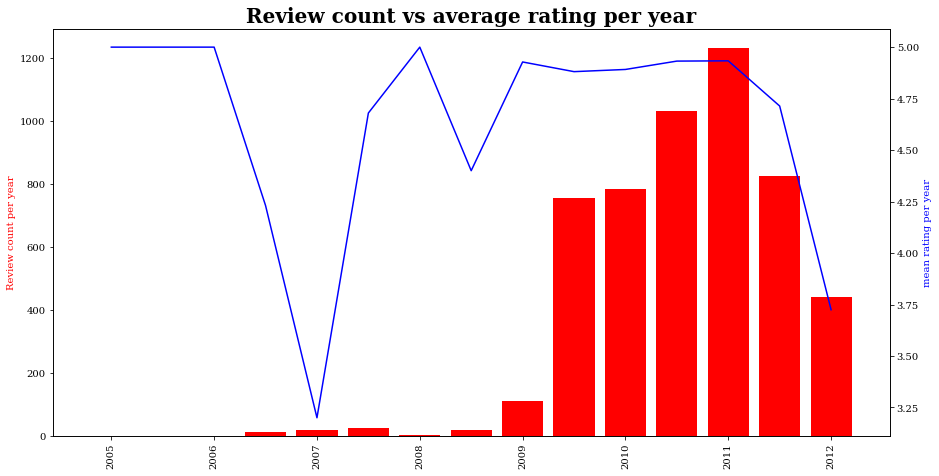

In [41]:
axes1 = beauty_df.groupby(['year']).count()[['reviewText']]
axes2 = beauty_df.groupby('year').mean()[['productRating']]

key = [key for key, df in beauty_df.groupby('year')]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(key, axes1.reviewText, color = 'r')
ax2.plot(key, axes2.productRating, color = 'b')
ax1.set_xticklabels(key, rotation = 90)
ax1.set_ylabel('Review count per year', color = 'r')
ax2.set_ylabel('mean rating per year', color = 'b')
ax1.set_title('Review count vs average rating per year', fontsize =20, fontweight="bold")
fig = plt.gcf()
fig.set_size_inches(15, 7.5)
#fig.savefig('test2png.png', dpi=100)
plt.show()

<ipython-input-44-adcdaefd83d2>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(key, rotation = 90)


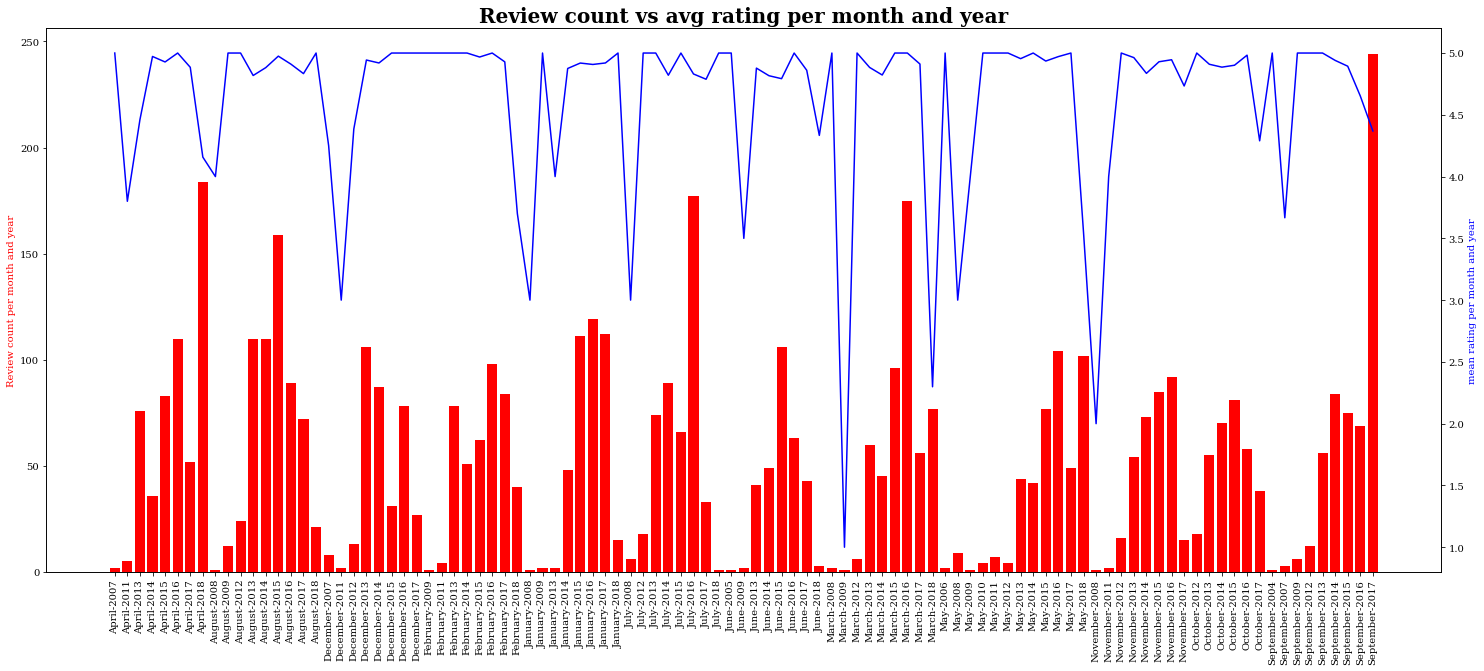

In [44]:
 axes1 = beauty_df.groupby(['yearMonth']).count()[['reviewText']]
axes2 = beauty_df.groupby('yearMonth').mean()[['productRating']]

key = [key for key, df in beauty_df.groupby('yearMonth')]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(key, axes1.reviewText, color = 'r')
ax2.plot(key, axes2.productRating, color = 'b')
ax1.set_xticklabels(key, rotation = 90)
ax1.set_ylabel('Review count per month and year', color = 'r')
ax2.set_ylabel('mean rating per month and year', color = 'b')
ax1.set_title('Review count vs avg rating per month and year', fontsize=20, fontweight="bold")
fig = plt.gcf()
fig.set_size_inches(25, 10)
#fig.savefig('test2png.png', dpi=100)
plt.show()

### Simple sentiment anlaysis

#### Creating a function to get the sentiment and the sentiment label 

In [16]:
def the_sentiment (text):
    blob = TextBlob(text)
    return blob.polarity

def the_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0.05:
        polarity_label = "positive"
    elif blob.polarity < -0.01:
        polarity_label = "negative"
    else:
        polarity_label = "neutral"
    return polarity_label

#### Create new columns for sentiment and sentiment labels

In [17]:
beauty_df["reviewText"] = beauty_df["reviewText"].astype(str)


beauty_df["sentiment"] = beauty_df["reviewText"].apply(the_sentiment)
beauty_df["sentimentLabel"] = beauty_df["reviewText"].apply(the_sentiment_label)

In [18]:
beauty_df.head()

,productRating,verified,reviewTime,reviewerID,productID,reviewerName,reviewText,size,year,yearMonth,sentiment,sentimentLabel
0,5,True,2016-09-01,A3CIUOJXQ5VDQ2,B0000530HU,Shelly F,As advertised. Reasonably priced,7.0 oz,2016,September-2016,0.200000,positive
1,5,True,2013-11-14,A3H7T87S984REU,B0000530HU,houserules18,Like the oder and the feel when I put it on my...,7.0 oz,2013,November-2013,-0.028125,negative
2,1,True,2013-08-18,A3J034YH7UG4KT,B0000530HU,Adam,I bought this to smell nice after I shave. Wh...,7.0 oz,2013,August-2013,-0.066667,negative
3,5,False,2011-05-03,A2UEO5XR3598GI,B0000530HU,Rich K,HEY!! I am an Aqua Velva Man and absolutely lo...,7.0 oz,2011,May-2011,0.217406,positive
4,5,True,2011-05-06,A3SFRT223XXWF7,B00006L9LC,C. C. Christian,If you ever want to feel pampered by a shampoo...,200ml/6.7oz,2011,May-2011,0.250000,positive


#### Number of each label

In [19]:
label_count = beauty_df.groupby("sentimentLabel").count().sort_values("sentiment", ascending=False)[["sentiment"]]

print("NUMBER OF POSITVE, NEGATIVE AND NEUTRAL REVIEWS: ")
label_count

NUMBER OF POSITVE, NEGATIVE AND NEUTRAL REVIEWS: 


,sentiment
sentimentLabel,
positive,4557
neutral,523
negative,189


#### Number of genuine good, bad and neutral engines

In [20]:
genuine_good_rating = beauty_df[(beauty_df['sentimentLabel']=='positive') & (beauty_df['productRating']>3)]

print("NUMBER OF GENUINE GOOD RATINGS: {}".format(len(genuine_good_rating)))

NUMBER OF GENUINE GOOD RATINGS: 4418


In [21]:
genuine_bad_rating = beauty_df[(beauty_df['sentimentLabel']=='negative') & (beauty_df['productRating']<3)]

print("NUMBER OF GENUINE BAD RATINGS: {}".format(len(genuine_bad_rating)))

NUMBER OF GENUINE BAD RATINGS: 54


In [22]:
genuine_neutral_rating = beauty_df[(beauty_df['sentimentLabel']=='neutral') & (beauty_df['productRating']==3)]

print("NUMBER OF GENUINE NEUTRAL RATINGS: {}".format(len(genuine_neutral_rating)))

NUMBER OF GENUINE NEUTRAL RATINGS: 30


#### Visualisations

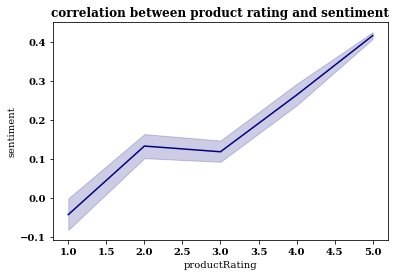

In [51]:
sns.lineplot(data=beauty_df,x='productRating',y='sentiment', color="navy")
plt.title('correlation between product rating and sentiment', fontsize = 12, fontweight = 'bold', color = 'black')
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
plt.show()

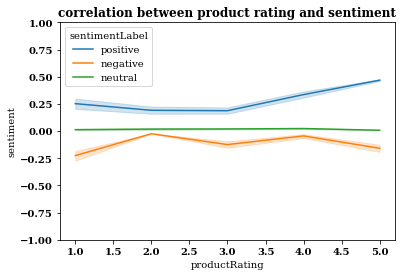

In [52]:
sns.lineplot(data=beauty_df,x='productRating',y='sentiment',hue='sentimentLabel')
plt.ylim(-1,1)
plt.title('correlation between product rating and sentiment', fontsize = 12, fontweight = 'bold', color = 'black')
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
plt.show()

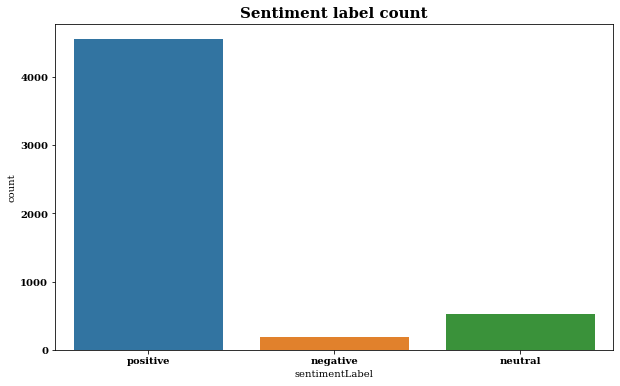

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(data=beauty_df, x="sentimentLabel")
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
plt.title("Sentiment label count", fontsize = 15, fontweight = 'bold', color = 'black')
plt.show()

### Analysis on products (productID)


#### Number of reviewed products 

In [23]:
no_of_products = len(beauty_df["productID"].unique())
print("Amount of products that were reviewed: {}".format(no_of_products))

Amount of products that were reviewed: 85


#### Reviews per product 

In [24]:
reviews_per_product = beauty_df.groupby("productID").count().sort_values("reviewText", ascending=False)[["reviewText"]]
reviews_per_product.rename(columns={"reviewText":"numberOfReviews"}, inplace=True)

print("NUMBER OF REVIEWS PER PRODUCT: ")
reviews_per_product

NUMBER OF REVIEWS PER PRODUCT: 


,numberOfReviews
productID,
B0012Y0ZG2,1794
B000URXP6E,858
B001OHV1H4,489
B00006L9LC,489
B0009RF9DW,392
...,...
B00MGK9Z8U,1
B0091OCA86,1
B00B7V273E,1


#### Most and least reviewed products


In [25]:
top_products = reviews_per_product["numberOfReviews"].nlargest(10)

print("MOST REVIEWED PRODUCTS: \n{}".format(top_products))

MOST REVIEWED PRODUCTS: 
productID
B0012Y0ZG2    1794
B000URXP6E     858
B001OHV1H4     489
B00006L9LC     489
B0009RF9DW     392
B000FI4S1E     392
B00W259T7G     163
B0010ZBORW      98
B0013NB7DW      40
B001LNODUS      33
Name: numberOfReviews, dtype: int64


In [26]:
least_products = reviews_per_product["numberOfReviews"].nsmallest(10)

print("LEAST REVIEWED PRODUCTS: \n{}".format(least_products))

LEAST REVIEWED PRODUCTS: 
productID
B00MGK9Z8U    1
B0091OCA86    1
B00B7V273E    1
B00GHJOM2U    1
B01DKQAXC0    1
B00126LYJM    2
B0002JHI1I    2
B0014SQQ3M    2
B00155Z6V2    2
B00157OBRU    2
Name: numberOfReviews, dtype: int64


#### Sentiment labels per product

In [27]:
product_sentiment = beauty_df.groupby(["productID", "sentimentLabel"]).count().sort_values(
    "sentiment", ascending=False)[["sentiment"]]

product_sentiment

,,sentiment
productID,sentimentLabel,
B0012Y0ZG2,positive,1559
B000URXP6E,positive,741
B001OHV1H4,positive,420
B00006L9LC,positive,420
B000FI4S1E,positive,344
...,...,...
B00B7V273E,neutral,1
B00JF2GVWK,neutral,1
B001E96LUO,neutral,1


#### Visualisations

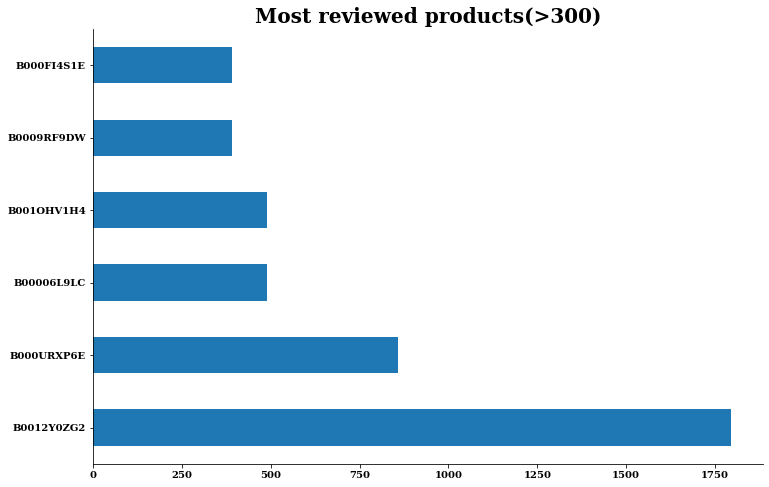

In [55]:
plt.figure(figsize=(12,8))
beauty_df["productID"].value_counts().nlargest(6).plot(kind='barh')
plt.title("Most reviewed products(>300)", fontsize=20, fontweight="bold")
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
sns.despine()
plt.show()

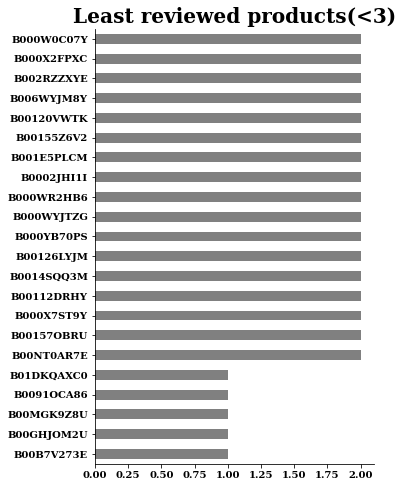

In [56]:
plt.figure(figsize=(5,8))
beauty_df["productID"].value_counts().nsmallest(22).plot(kind='barh', color="grey")
plt.title("Least reviewed products(<3)", fontsize=20, fontweight="bold")
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
sns.despine()
plt.show()

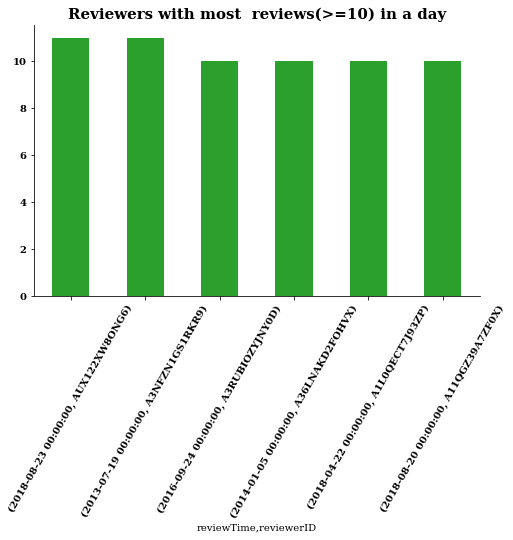

In [57]:
plt.figure(figsize=(8,5))
review_per_day["numberOfReviews"].nlargest(6).plot(kind="bar",color="tab:green")
plt.title("Reviewers with most  reviews(>=10) in a day", fontsize=15, fontweight="bold")
plt.xticks(fontweight = 'bold', color = 'black', rotation=60)       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
sns.despine()
plt.show()


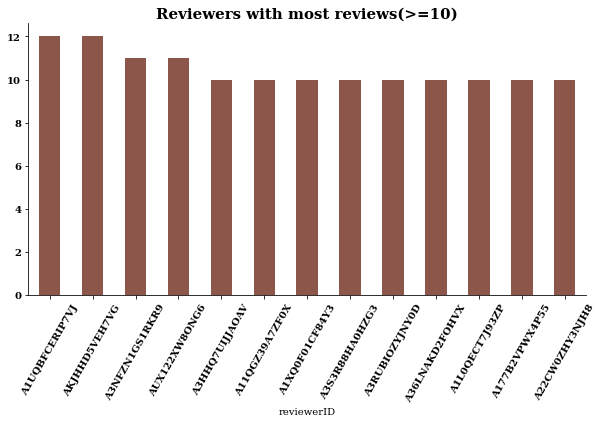

In [58]:
plt.figure(figsize=(10,5))
review_count["numberOfReviews"].nlargest(13).plot(kind="bar",color="tab:brown")
plt.title("Reviewers with most reviews(>=10)", fontsize=15, fontweight="bold")
plt.xticks(fontweight = 'bold', color = 'black', rotation=60)       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
sns.despine()
plt.show()

### Analysis on reviewers 

#### Number of reviewers

In [28]:
no_of_products = len(beauty_df["reviewerID"].unique())
print("NUmber of reviewers: {}".format(no_of_products))

NUmber of reviewers: 991


#### Review count per reviewer

In [29]:
review_count = beauty_df.groupby("reviewerID").count().sort_values("reviewText", ascending=False)[["reviewText"]]
review_count.rename(columns={"reviewText":"numberOfReviews"}, inplace=True)

print("NUMBER OF REVIEWS PER REVIEWER: ")
review_count

NUMBER OF REVIEWS PER REVIEWER: 


,numberOfReviews
reviewerID,
A1UQBFCERIP7VJ,12
AKJHHD5VEH7VG,12
A3NFZN1GS1RKR9,11
AUX122XW8ONG6,11
A3HHQ7UIJJAOAV,10
...,...
A2G7EEQJKKOU8R,5
A2G90R2ZU6KU5D,5
A2GBIFL43U1LKJ,5


#### Most reviews done in a day per reviewer

In [30]:
review_per_day = beauty_df.groupby(['reviewTime', 'reviewerID']).count().sort_values(
    'reviewText', ascending=False)[["reviewText"]]
review_per_day.rename(columns={"reviewText":"numberOfReviews"}, inplace=True)

print("MOST REVIEWS DONE IN A DAY PER REVIEWER: ")
review_per_day

MOST REVIEWS DONE IN A DAY PER REVIEWER: 


,,numberOfReviews
reviewTime,reviewerID,
2018-08-23,AUX122XW8ONG6,11
2013-07-19,A3NFZN1GS1RKR9,11
2016-09-24,A3RUBIOZYJNY0D,10
2014-01-05,A36LNAKD2FOHVX,10
2018-04-22,A1L0QECT7J93ZP,10
...,...,...
2017-07-23,A2YKWYC3WQJX5J,1
2017-07-22,A914TQVHI872U,1
2013-05-13,A2JCJJNY43QQIV,1


### Analysis on product ratings

In [31]:
axes1 = beauty_df.groupby('productID').count()
axes2 = beauty_df.groupby('productID').mean()

#### Average rating per product

In [32]:
rating_per_product = beauty_df.groupby("productID").agg({"reviewText":"count","productRating":"mean"}).sort_values(
    "reviewText",ascending=False)
rating_per_product.rename(columns={"reviewText":"numberOfReviews", "productRating":"averageProductRating"}, inplace=True)

print("AVERAGE RATING PER PRODUCT:")
rating_per_product

AVERAGE RATING PER PRODUCT:


,numberOfReviews,averageProductRating
productID,,
B0012Y0ZG2,1794,4.846154
B000URXP6E,858,4.837995
B001OHV1H4,489,4.762781
B00006L9LC,489,4.762781
B0009RF9DW,392,4.941327
...,...,...
B00MGK9Z8U,1,5.000000
B0091OCA86,1,5.000000
B00B7V273E,1,2.000000


#### Average rating per reviewer

In [33]:
rating_per_reviewer = beauty_df.groupby("reviewerID").agg({"reviewText":"count","productRating":"mean"}).sort_values(
    "reviewText",ascending=False)
rating_per_reviewer.rename(columns={"reviewText":"numberOfReviews", "productRating":"averageProductRating"}, inplace=True)

print("AVERAGE RATING PER REVIEWER:")
rating_per_reviewer

AVERAGE RATING PER REVIEWER:


,numberOfReviews,averageProductRating
reviewerID,,
A1UQBFCERIP7VJ,12,4.083333
AKJHHD5VEH7VG,12,3.500000
A3NFZN1GS1RKR9,11,5.000000
AUX122XW8ONG6,11,5.000000
A3HHQ7UIJJAOAV,10,5.000000
...,...,...
A2G7EEQJKKOU8R,5,5.000000
A2G90R2ZU6KU5D,5,5.000000
A2GBIFL43U1LKJ,5,5.000000


#### Least satisfied customers

In [34]:
least_sat_cust = rating_per_reviewer["averageProductRating"].nsmallest(10)

print("LEAST SATISFIED CUSTOMERS: \n{}".format(least_sat_cust))

LEAST SATISFIED CUSTOMERS: 
reviewerID
A3J034YH7UG4KT    1.0
A3IOV1NJ4IM2HC    1.0
A3IJDWW3VVLF3G    1.0
A3JQUR31CLU4VK    1.0
AYKOSAJTP5AVS     1.0
A7ID5H7FWLJHC     1.0
AEL1DK2OJ41ZZ     1.0
ADUKTDKBY4CNP     1.0
A3W3YT08F94PO7    1.0
A1ZM06J2A5XGHY    1.0
Name: averageProductRating, dtype: float64


#### Visualisation

<ipython-input-59-207516dd15df>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(key, rotation = 90, fontweight="bold")


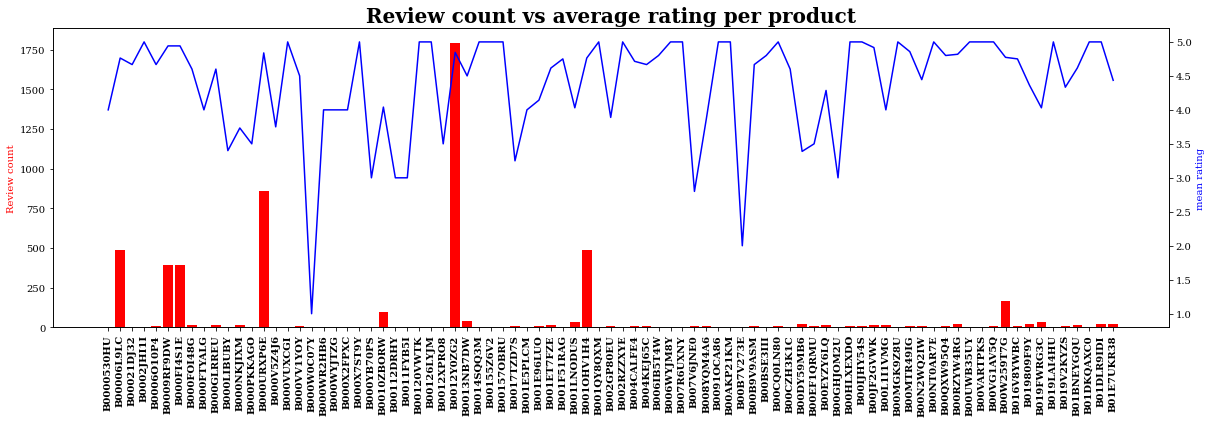

In [59]:
axes1 = beauty_df.groupby('productID').count()
axes2 = beauty_df.groupby('productID').mean()
key = [key for key, df in beauty_df.groupby('productID')]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(key, axes1.productRating, color = 'r')
ax2.plot(key, axes2.productRating, color = 'b')
ax1.set_xticklabels(key, rotation = 90, fontweight="bold")
ax1.set_ylabel('Review count', color = 'r')
ax2.set_ylabel('mean rating', color = 'b')
ax1.set_title('Review count vs average rating per product', fontsize=20, fontweight="bold")
fig = plt.gcf()
fig.set_size_inches(20, 5.5)
#fig.savefig('test2png.png', dpi=100)
plt.show()